In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Iris\Iris_NE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,NaN
2,4.7,3.2,1.3,0.2
3,NaN,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,NaN,3.0,5.2,2.3
146,6.3,NaN,5.0,1.9
147,6.5,3.0,5.2,NaN
148,NaN,3.4,5.4,2.3


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	43
float64		column 2	57
float64		column 3	0
float64		column 4	14


In [4]:
df.describe()

,column 1,column 2,column 3,column 4
count,107.000000,93.000000,150.000000,136.000000
mean,5.825234,3.089247,3.758667,1.205147
std,0.818085,0.332468,1.764420,0.755848
min,4.300000,2.400000,1.000000,0.100000
25%,5.100000,2.900000,1.600000,0.300000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.200000,6.900000,2.500000


<AxesSubplot:>

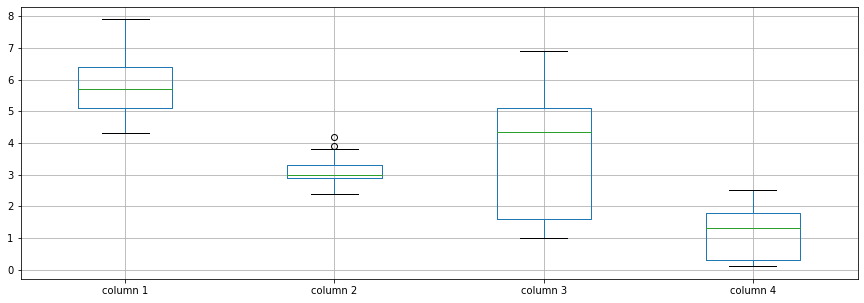

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    5.825234
column 2    3.089247
column 3    3.758667
column 4    1.205147
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4
column 1,1.000000,-0.211589,0.865834,0.805031
column 2,-0.211589,1.000000,-0.393485,-0.349789
column 3,0.865834,-0.393485,1.000000,0.964420
column 4,0.805031,-0.349789,0.964420,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [10]:
imputer = md.Midas(layer_structure = [4,4+66,4+66+66,4+66+66+66,4+66+66+66+66,4+66+66+66,4+66+66,4+66,4], vae_layer = False, seed = 4)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [4]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 11.519807603624132
Epoch: 1 , loss: 11.424344910515678
Epoch: 2 , loss: 11.561812082926432
Epoch: 3 , loss: 11.563043382432726
Epoch: 4 , loss: 11.502975887722439
Epoch: 5 , loss: 11.504108640882704
Epoch: 6 , loss: 11.474298159281412
Epoch: 7 , loss: 11.504162470499674
Epoch: 8 , loss: 11.495790269639757
Epoch: 9 , loss: 11.4411653942532
Epoch: 10 , loss: 11.445803430345324
Epoch: 11 , loss: 11.523297945658365
Epoch: 12 , loss: 11.445636219448513
Epoch: 13 , loss: 11.402654647827148
Epoch: 14 , loss: 11.385873476664225
Epoch: 15 , loss: 11.549875259399414
Epoch: 16 , loss: 11.431415028042263
Epoch: 17 , loss: 11.482592158847385
Epoch: 18 , loss: 11.555934058295357
Epoch: 19 , loss: 11.610086335076225
Epoch: 20 , loss: 11.353354454040527
Epoch: 21 , loss: 11.618246714274088
Epoch: 22 , loss: 11.32996686299642
Epoch: 23 , loss: 11.493575519985622
Epoch: 24 , loss: 11.5512392255995
Epoch: 25 , loss: 11.45

In [11]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(150, 4)

In [12]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    5.100000
column 2    0.015306
column 3    1.500000
column 4    0.400000
Name: 21, dtype: float64

In [13]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Iris.xlsx', header=None,names=column_names)

In [14]:
new_df-complete_df

,column 1,column 2,column 3,column 4
0,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.0,-0.185790
2,0.000000,0.000000,0.0,0.000000
3,-4.581367,0.000000,0.0,0.000000
4,0.000000,0.000000,0.0,0.000000
...,...,...,...,...
145,-6.683390,0.000000,0.0,0.000000
146,0.000000,-2.484234,0.0,0.000000
147,0.000000,0.000000,0.0,-1.982755
148,-6.183813,0.000000,0.0,0.000000


Calculating NRMSE Value

In [15]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [16]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [17]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(45.44131774832083, 97.653468960401)

In [18]:
NRMS=numerator/denominator
NRMS


0.465332345405441

In [19]:
new_df.iloc[66,:]

column 1    5.6
column 2    3.0
column 3    4.5
column 4    1.5
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4
0,5.100000,3.500000,1.4,0.200000
1,4.900000,3.000000,1.4,0.014210
2,4.700000,3.200000,1.3,0.200000
3,0.018633,3.100000,1.5,0.200000
4,5.000000,3.600000,1.4,0.200000
...,...,...,...,...
145,0.016610,3.000000,5.2,2.300000
146,6.300000,0.015766,5.0,1.900000
147,6.500000,3.000000,5.2,0.017245
148,0.016187,3.400000,5.4,2.300000


In [21]:
imputations[-1].to_excel("Iris_NE_20(imp).xlsx", index=False, header=False)